In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense


In [47]:
current_path=os.getcwd()

In [48]:
os.listdir(current_path)

['data', 'dog_cat.ipynb']

In [49]:
print("Total number of cat images:", len(os.listdir(os.path.join(current_path, 'Data', 'images', 'cats'))))

Total number of cat images: 349


In [50]:
print("Total number of dog images:", len(os.listdir(os.path.join(current_path, 'Data', 'images', 'dogs'))))

Total number of dog images: 348


In [51]:
images_path=os.path.join(current_path,'Data','images')

In [52]:
os.listdir(images_path)


['cats', 'data', 'dogs']

In [53]:
path_dict= {"cats":[],"dogs":[]}
for dir in os.listdir(images_path):
    directory_path = os.path.join(images_path,dir)
    for images in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path,images))


In [54]:
path_dict

{'cats': ['c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_1.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_10.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_100.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_101.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_102.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_103.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_104.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_106.jpg',
  'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_109.jpg',
  'c:\\Users\\rasht\\On

In [55]:
from PIL import Image

In [56]:
path_dict['cats'][10]

'c:\\Users\\rasht\\OneDrive\\Desktop\\data science\\deep learning\\CNN\\Data\\images\\cats\\cat_111.jpg'

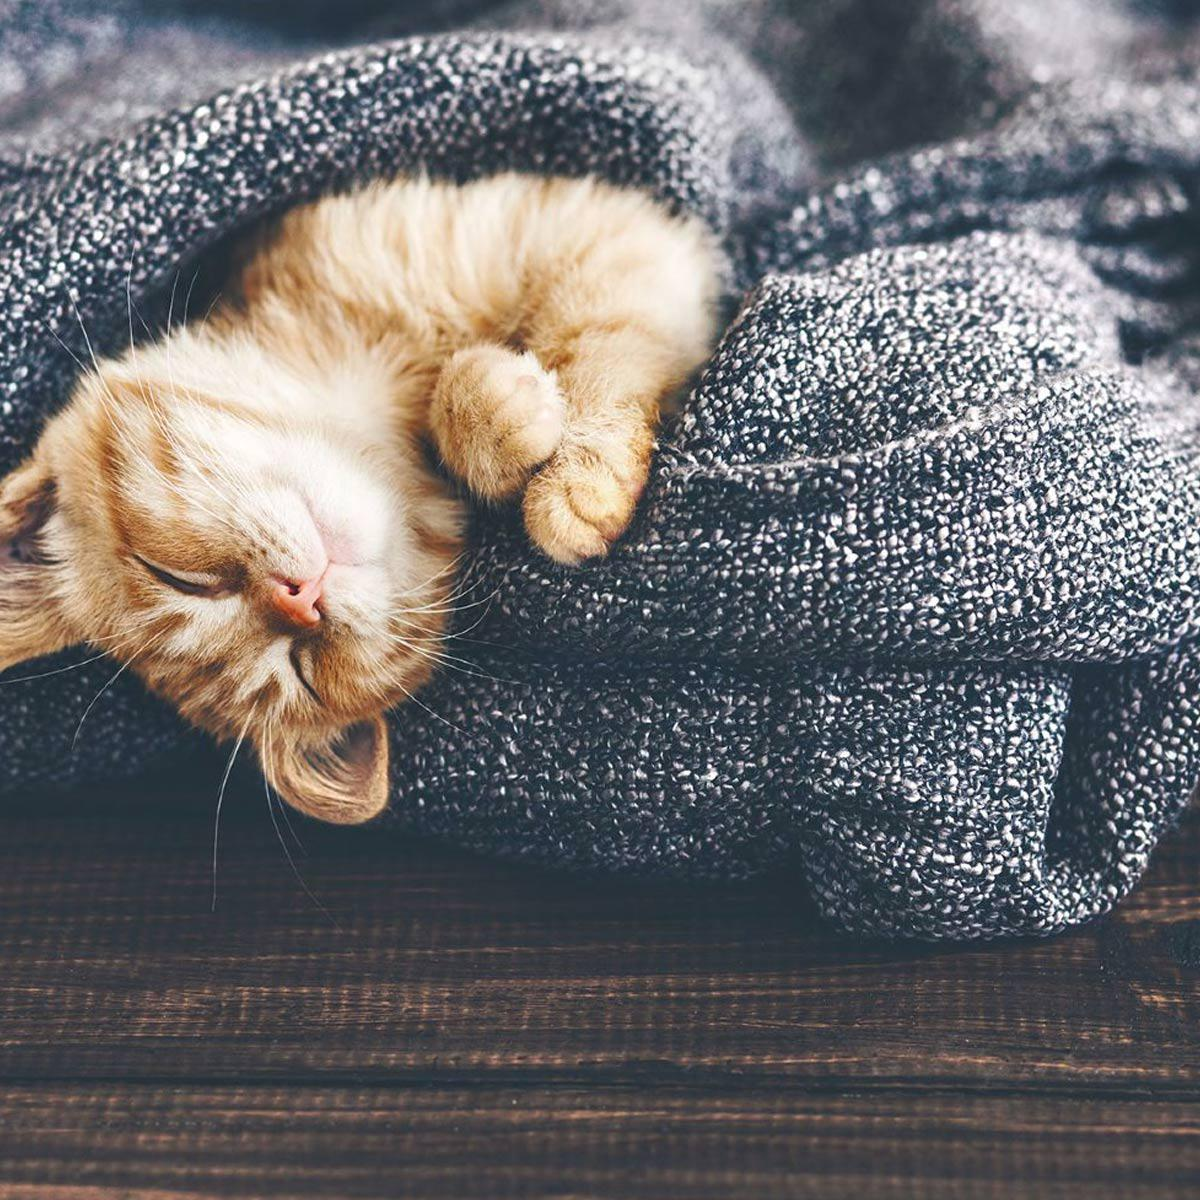

In [57]:
Image.open(path_dict['cats'][10])

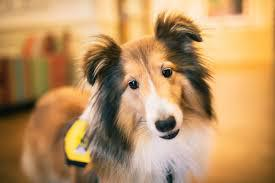

In [58]:
Image.open(path_dict['dogs'][12])

In [59]:
import cv2

In [60]:
path_dict.keys()

dict_keys(['cats', 'dogs'])

In [61]:
img_arr_list = []
labels = []
for key ,val in path_dict.items():
    for path in val:
        img_arr=cv2.imread(path)
        resized_img=cv2.resize(img_arr,(224,224))
        img_arr_list.append(resized_img)
        labels.append(key)

In [62]:
img_arr_list

[array([[[156, 141,  92],
         [159, 144, 102],
         [159, 145, 112],
         ...,
         [152, 142,  75],
         [156, 144,  80],
         [160, 148,  84]],
 
        [[151, 136,  87],
         [155, 140,  97],
         [157, 143, 107],
         ...,
         [151, 140,  75],
         [154, 142,  77],
         [157, 145,  81]],
 
        [[150, 136,  86],
         [155, 141,  96],
         [155, 140, 102],
         ...,
         [151, 139,  75],
         [153, 141,  77],
         [157, 145,  81]],
 
        ...,
 
        [[ 81,  90,  99],
         [ 77,  86,  95],
         [ 79,  88,  97],
         ...,
         [ 37,  42,  60],
         [ 39,  42,  57],
         [ 40,  43,  58]],
 
        [[ 52,  59,  59],
         [ 54,  60,  61],
         [ 51,  57,  58],
         ...,
         [ 40,  44,  59],
         [ 42,  45,  60],
         [ 43,  46,  61]],
 
        [[ 37,  41,  36],
         [ 33,  37,  34],
         [ 35,  38,  35],
         ...,
         [ 40,  43,  56],
  

In [63]:
img_arr_list=np.array(img_arr_list)

In [64]:
img_arr_list.shape

(697, 224, 224, 3)

In [65]:
labels=np.array(labels)


In [66]:
labels.shape

(697,)

In [67]:
labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

In [68]:
binary_labels = [0 if label == 'cats' else 1 for label in labels]
binary_labels = np.array(binary_labels)



In [69]:
binary_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test =train_test_split(img_arr_list,binary_labels,test_size=0.2)

In [71]:
x_train=x_train/255
x_test=x_test/255

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [73]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,476,037 (32.33 MB)

 Trainable params: 2,825,345 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,650,692 (21.56 MB)

In [76]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 601ms/step - accuracy: 0.7576 - loss: 0.4964
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.8456 - loss: 0.3352
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 576ms/step - accuracy: 0.9048 - loss: 0.2289
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 554ms/step - accuracy: 0.9246 - loss: 0.1902
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 582ms/step - accuracy: 0.9605 - loss: 0.0927


In [80]:
pred=model.predict(x_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


In [81]:
pred=(pred>0.5).astype(int)

In [82]:
pred

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [83]:
model.save('model.h5')